# PCA

## Dimensionality Problem


Too many features can make the analysis too complex. Somethimes we need to reduce the dimension of the feature space. 
- some features are almost constant
- some features highly correlated
<br>

Solution: __dimensionality reduction__
<br>

Benefits
- reduce time
- reduce memory
- improve the accuracy of the results
<br>

There are many ways to achieve dimensionality reduction, but most of these techniques fall into one of two classes:
- __Feature Elimination__ - removing some of the features, which we find less informative or correlated with each other
  - select the important features, considering the domain knowledge
  - remove correlated features
  - remove low variance features<br>

- __Feature Extraction__   - reducing the dimensionality

<br>le
results




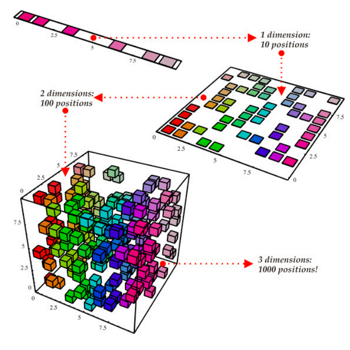

A simple dimensionalty reduction would loose valuable data. We nbeed a method, which would keep all the variety of the source data.

### Principal Component Analysis
Principal component analysis, or __PCA__, is a _statistical technique_ for feature extraction, converting
high dimensional data to low dimensional data by selecting the most important features, which provide maximum information about the dataset. <br>

With PCA we __replace the existing features with a set of new features__. The new features are calculated as linear functions of the old ones, while trying to maximize the __variance__, which they cause in the output.<br>

__Once the new features are calculated, we sort the new features by their importance (contribution to the variance), keep the most important and remove the least important__.
<br><br>
<hr>

The features we select to build the ML model with are the __principal components__.<br>




- the feature that causes highest variance is the first principal component (see the figure below)
- the feature that is responsible for second highest variance is considered the second principal component, and so on. <br><br>

> Principal components do not have any correlation with each other.<br>
> PCA works best on normalized features.<br>
> PCA requires numeric data only.

<hr>

How does it work?

It searches for a line, which would capture most of the data variety.

If one line is not sufficient, it woulkd search for a second one, which capture most of the remaining data, etc.

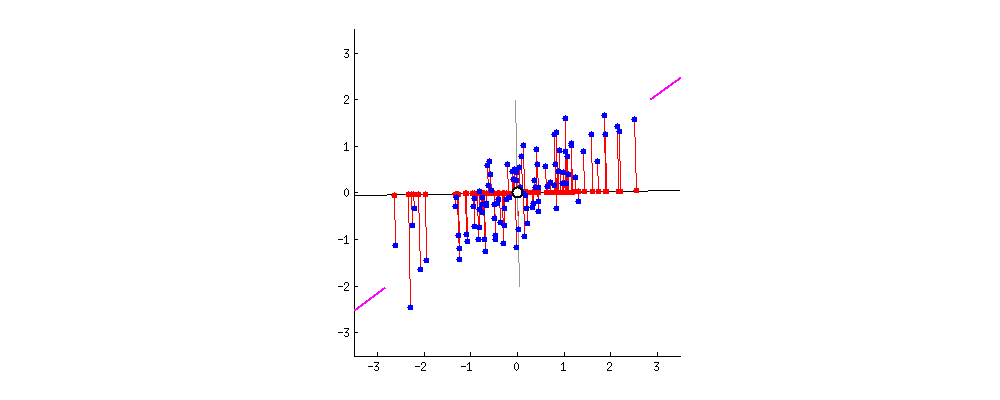

https://builtin.com/data-science/step-step-explanation-principal-component-analysis

Among all possible lines, the one that keeps projections to most points is the pink one - it will be the first principal component, PC.<br>
The second PC is the next best, so is the third, and so on.<br>

Therefore, the  first PC contains most information and has to stay, while the last one is the least informative and can be dismissed.


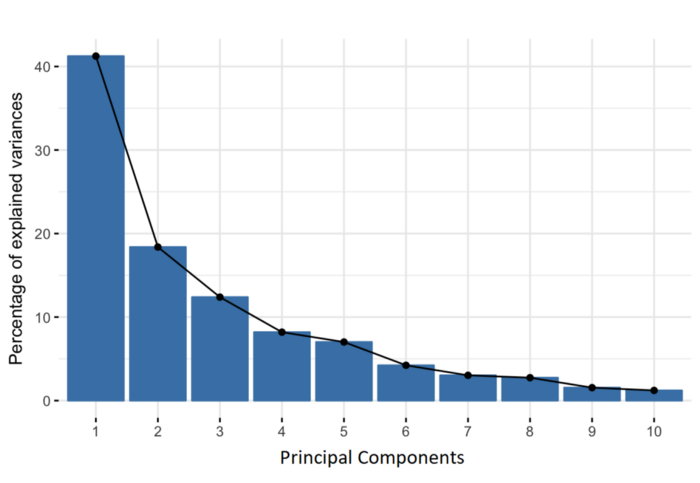

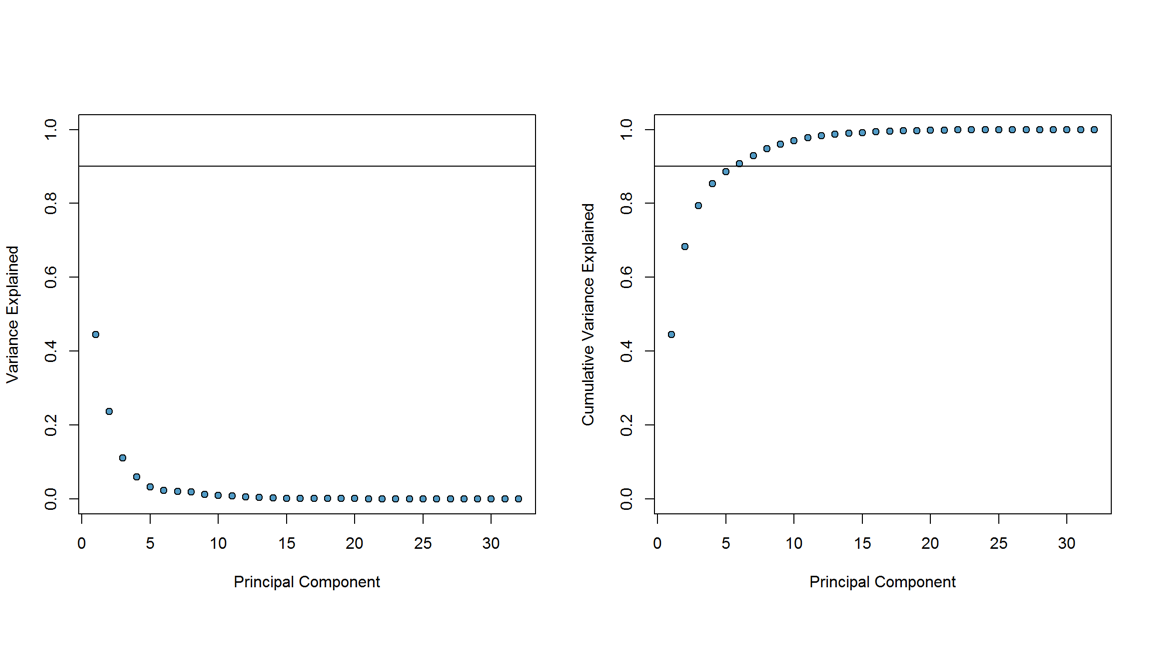

### Loss Functions

We have different methods for estimation of the error, while searching for principal components.
- L1 - Least Absolute Deviation - tries to minimize the sum of the distances of all points to the line
- L2 - Least Squared Deviation  - tries to minimize the sum of the square of distances of all points to the line

We will apply PCA on sales data from the file _sales.csv_.

## Step 1: Environment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep

## Step 2: Data Preparation

In [ ]:
# Load data from a file
X = pd.read_csv('../Data/sales.csv')

In [ ]:
X.shape

In [ ]:
X.head()

In [ ]:
# Remove first column, as it doesn't provide information
X = X.drop(['Store id'], axis=1)
X.head()

In [ ]:
# Convert data frame to array
X = X.values
X

### 2.1 Data Normalization

We rescale the row data (vectors with at least one non zero component), keeping proportions between elements comparable and resistant to outliers:   __xi/sqrt( xi²+yi²+zi²)__<br>

__Each sample__ (a row in the data matrix) is rescaled __independently__ of other samples so that its norm (l1 or l2 below) equals one.<br>

In [ ]:
# Method L1: Least Absolute Deviation
# if we add the normalized values in each row, the sum of the new values is always 1
nl1 = prep.normalize(X, norm='l1')
nl1

In [ ]:
# Method L2: Least Squared Deviation 
# if we square each element in the vector (row), and summed them, the sum would equal 1
nl2 = prep.normalize(X, norm='l2')
nl2

We replace the original data set with the any one of these new arrays and continue with the next data preparation procedures.

### 2.2 Data Scaling
Scaling makes the __values of the different features comparable__.

#### Standard Scaler

Standard features scaling transform the data, so that the distribution will have a mean=0 and a standard deviation=1<br> __(xi–mean(x))/stdev(x)__<br>
See the illustration below.<br>
The __Standard Scaler__ assumes that the data is normally distributed (follows a __Gaussian distribution__).

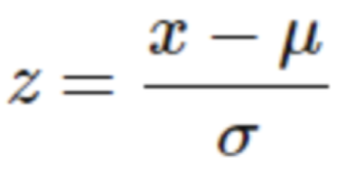
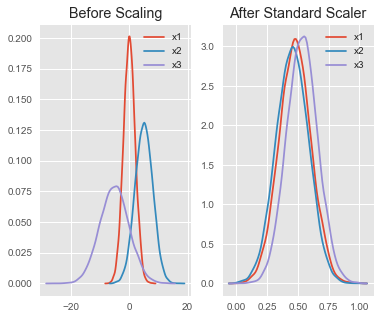<br>
Source: https://medium.com/@ian.dzindo01/feature-scaling-in-python-a59cc72147c1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X = sc.fit_transform(X)  
X

#### Min-Max Scaler

Min-Max Scaler uses the following formula for calculating each feature: __(xi–min(x))/ (max(x)–min(x))__<br>
By default, the data is transformed into a range [0, 1] or [-1, 1], if there are negative values).
See the illustration below.<br>
Can be used instead of Standard Scaler for __non-Gaussian distributions__.

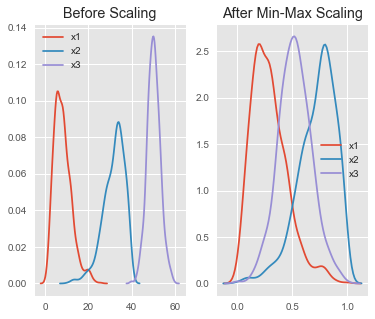<br>
Source: https://medium.com/@ian.dzindo01/feature-scaling-in-python-a59cc72147c1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)  
X

### 2.3 PCA and Feature Selection

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_data = pca.fit_transform(X)
pca_data

In [ ]:
# The PCA class contains explained variance  ratio, 
# which returns the variance caused by each of the principal components
explained_variance = pca.explained_variance_ratio_  
explained_variance

It can be seen that first principal component is responsible for 43.80% variance. Similarly, the second principal component causes 28.05% variance in the dataset. 

In [ ]:
# Plot the explained_variance
plt.plot(explained_variance, 'bx-', c='red')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

In [ ]:
# Plot the cumulative explained_variance
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'b*-', c='green')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

In [ ]:
pca = PCA(n_components=5)
pca_data = pca.fit_transform(X)
pca_data

In [ ]:
pcadf = pd.DataFrame(data = pca_data, columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5'])
pcadf

## Your Task: Experiment with different data sources and number of principal components

### Observe the effect of the components

## See More
https://medium.com/@ian.dzindo01/feature-scaling-in-python-a59cc72147c1